# 1. Introduction

In logistic regression, we deal with a binary classification problem. Our aim is to optimize the cost function of linear regression so that it correctly predicts binary outcomes. 

To achieve this, we modify the cost function in such a way that it heavily penalizes incorrect predictions:

1. When $ y = 1 $ and $ y_{\text{pred}} = 0 $, we want the loss to be very high. This can be achieved with the function:

   $$
   -\log(1 - y_{\text{pred}})
   $$
   
That function looks like this:

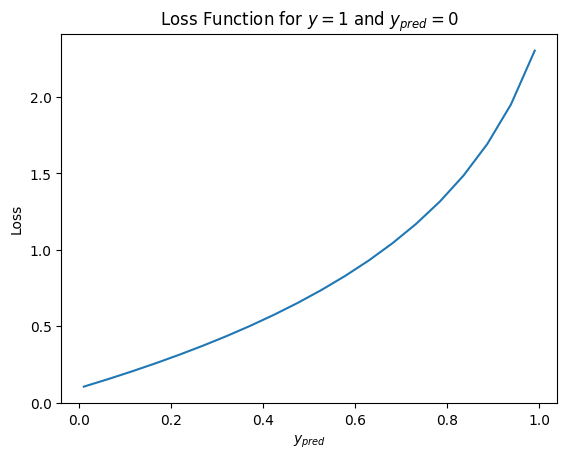

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Plot for -log(1 - y_pred)
plt.plot(np.linspace(0.01, 0.99, 20), [-np.log(1 - value) for value in np.linspace(0.1, 0.9, 20)])
plt.title('Loss Function for $y=1$ and $y_{pred}=0$')
plt.xlabel('$y_{pred}$')
plt.ylabel('Loss')
plt.show()

2. Similarly, when $ y = 0 $ and $ y_{\text{pred}} = 1 $, the loss should also be high, represented by:

   $$
   -\log(y_{\text{pred}})
   $$
   
This function looks like this:

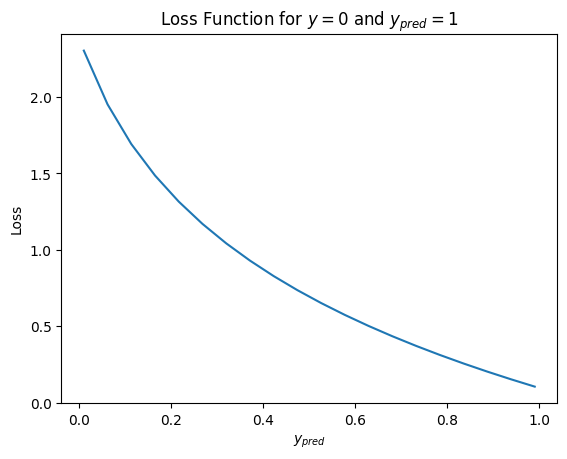

In [3]:
# Plot for -log(y_pred)
plt.plot(np.linspace(0.01, 0.99, 20), [-np.log(value) for value in np.linspace(0.1, 0.9, 20)])
plt.title('Loss Function for $y=0$ and $y_{pred}=1$')
plt.xlabel('$y_{pred}$')
plt.ylabel('Loss')
plt.show()

The overall cost function for logistic regression is then expressed as:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h(x^{(i)})) + (1 - y^{(i)}) \log(1 - h(x^{(i)})) \right]
$$

where $ h(x) $ is the activation function, often the **sigmoid** function, which maps our prediction to a probability between 0 and 1.


### 1.1. Sigmoid Function
The sigmoid function is commonly used as the activation function in logistic regression because it maps real values into the range of $[0, 1]$, which makes it suitable for binary classification. The formula for the sigmoid function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The function outputs a probability that indicates the likelihood that the input belongs to the positive class (i.e., $ y = 1 $).



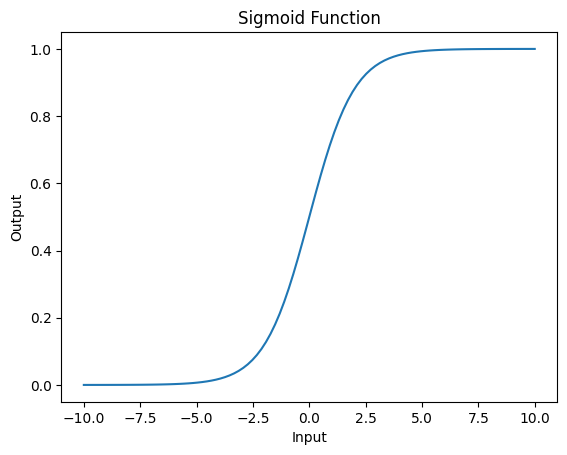

In [4]:
# Sigmoid function
def sigmoid(pred):
    return 1 / (1 + np.exp(-pred))

# Plot sigmoid function
plt.plot(np.linspace(-10, 10, 100), [sigmoid(value) for value in np.linspace(-10, 10, 100)])
plt.title('Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

### 1.2. Gradient Descent for Logistic Regression

We will use gradient descent to optimize the cost function for logistic regression. The partial derivative of the cost function with respect to a parameter $ \theta_j $ is:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

We will implement the gradient descent algorithm in a vectorized form for efficiency.

In [5]:
# Gradient descent for logistic regression
def gradientDescentVecLogistic(X, y, alpha, iterations):
    """
    Perform logistic regression using gradient descent.
    
    Parameters:
    - X: Input feature matrix
    - y: Target vector
    - alpha: Learning rate
    - iterations: Number of iterations for gradient descent
    
    Returns:
    - theta: Optimized parameters
    """
    app_X = np.ones((X.shape[0], 1))  # Add a column of ones for the bias term (theta_0)
    X = np.hstack((app_X, X))         # Concatenate the bias term to X
    theta = np.zeros((X.shape[1], 1))  # Initialize theta with zeros
    
    for i in range(iterations):
        # Compute predictions
        predictions = sigmoid(np.dot(X, theta))
        errors = predictions - y
        
        # Gradient descent update rule
        theta -= alpha * (1 / y.shape[0]) * np.dot(X.T, errors)
    
    return theta

# 2. Example
We'll now test our logistic regression implementation on the famous **Iris dataset**. Since this dataset has three classes, we will only consider two classes for binary classification (class 0 vs. class 1).

In [11]:
from sklearn.datasets import load_iris

# Load the Iris dataset
X, y = load_iris(return_X_y=True) 
y = y[~(y == 2)]  # Filter out class 2 (for binary classification)
X = X[:100, :]    # Use only the first 100 samples (class 0 and class 1)

# Train logistic regression model
theta = gradientDescentVecLogistic(X, y.reshape(-1, 1), 0.01, 10000)

# Make predictions
X_pred = np.hstack((np.ones((X.shape[0], 1)), X))  # Add the bias term
predictions = sigmoid(np.dot(X_pred, theta))
predictions_binary = np.where(predictions > 0.5, 1, 0).flatten()

# Display predictions
predictions_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Now let's evaluate the performance of our logistic regression model by calculating its accuracy on the dataset.

In [12]:
# Evaluate accuracy
accuracy = np.mean(predictions_binary == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


A common way to visualize the performance of a binary classifier is by plotting the decision boundary, which separates the two classes. Here, we can plot the decision boundary by looking at the relationship between the two features (in this case, two chosen features from the Iris dataset).

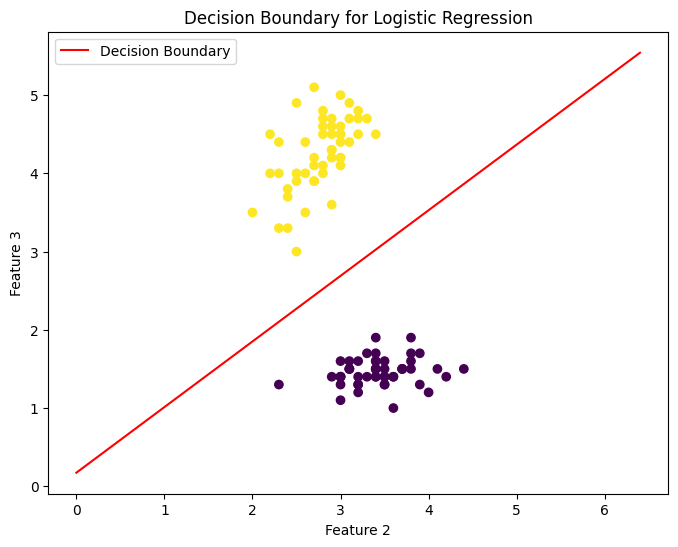

In [16]:
def plot_decision_boundary(X, theta):
    # X should be a 2D array with 2 features for visualization purposes
    plt.figure(figsize=(8,6))
    
    # Scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

    # Calculate the decision boundary (only works for 2 features)
    x_values = [np.min(X[:, 0] - 2), np.max(X[:, 0] + 2)]
    
    # Since theta[1] corresponds to the first feature and theta[2] to the second
    y_values = -(theta[0] + theta[1] * np.array(x_values)) / theta[2]
    
    # Plot the decision boundary
    plt.plot(x_values, y_values, label='Decision Boundary', color='red')
    
    plt.xlabel('Feature 2')
    plt.ylabel('Feature 3')
    plt.legend()
    plt.title('Decision Boundary for Logistic Regression')
    plt.show()

# Let's use only the first two features for easy visualization
X_viz = X[:, 1:3]
theta_viz = gradientDescentVecLogistic(X_viz, y.reshape(-1, 1), 0.01, 10000)
plot_decision_boundary(X_viz, theta_viz)

# 3. Conclusion

In this notebook, we implemented logistic regression from scratch using gradient descent. We visualized the cost functions, the sigmoid function, and evaluated our model on a binary classification problem using the Iris dataset. We achieved decent accuracy and plotted the decision boundary to visualize the classification.

Feel free to experiment with different datasets, parameters, and even regularization techniques to further explore logistic regression.